# Project Overview
In this project, we'll build a <b>binary classification model</b> from scratch to predict whether a tumor is malignant or benign based on its size. We'll implement:
- Logistic Regression from scratch.
- Use Gradient Descent for optimization.
- Sigmoid Function for probability estimation.
- Cross-Entropy Loss as the cost function.
- Visualization of decision boundaries.

In [7]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Display dataset information
print(f"Dataset Shape: {X.shape}")
print(f"Feature Names: {cancer.feature_names}")
print(f"Class Distribution: {np.bincount(y)}")

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Add bias term to both train and test data
X_train_with_bias = np.c_[np.ones(X_train_normalized.shape[0]), X_train_normalized]
X_test_with_bias = np.c_[np.ones(X_test_normalized.shape[0]), X_test_normalized]


Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class Distribution: [212 357]


### We'll implement:
- Sigmoid function for the logistic regression model.
- Cross-Entropy Loss for the cost function.
- Gradient Descent to optimize the model.

<b>Sigmoid Function</b>
$$g(z) = \frac{1}{1+e^{-z}}$$
 
<b>Cross-Entropy Loss</b>
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right]$$

<b>Gradient Descent Update Rule</b>
$$ W=W−α⋅∇ $$



In [27]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

# Cross-entropy loss
def cross_entropy_loss(y, y_pred):
    epsilon = 1e-10  # To avoid log(0) errors
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    history = []

    for i in range(epochs):
        # Predictions
        y_pred = predict(X, weights)

        # Compute the gradient
        gradient = (1/m) * np.dot(X.T, (y_pred - y))

        # Update weights
        weights -= learning_rate * gradient

        # Calculate loss
        loss = cross_entropy_loss(y, y_pred)
        history.append(loss)

        # Print progress every 100 epochs
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss:.4f}')
    
    return weights, history

Epoch 0, Loss: 2.4265
Epoch 100, Loss: 0.7160
Epoch 200, Loss: 0.3357
Epoch 300, Loss: 0.2229
Epoch 400, Loss: 0.1757
Epoch 500, Loss: 0.1505
Epoch 600, Loss: 0.1354
Epoch 700, Loss: 0.1256
Epoch 800, Loss: 0.1187
Epoch 900, Loss: 0.1137


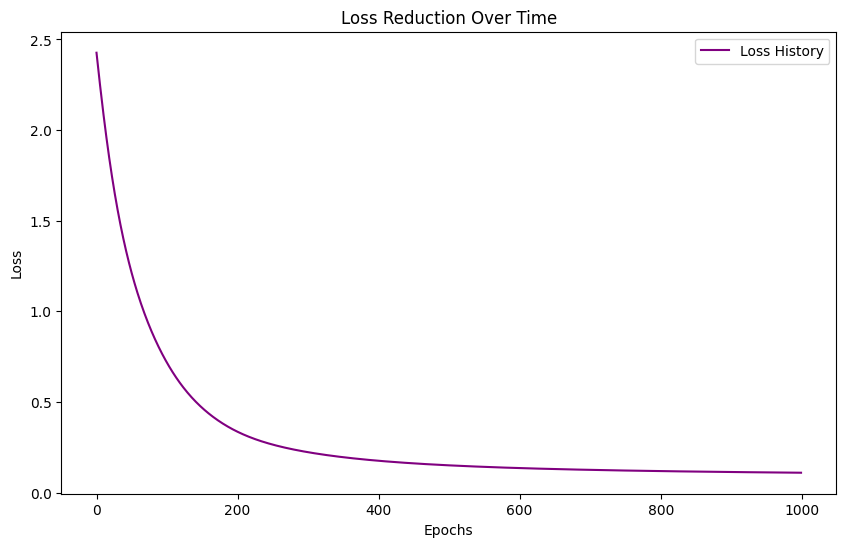

In [29]:
# Initialize weights
weights = np.random.randn(X_train_with_bias.shape[1])

# Training parameters
learning_rate = 0.01
epochs = 1000

# Train the model
weights, loss_history = gradient_descent(X_train_with_bias, y_train, weights, learning_rate, epochs)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, label='Loss History', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Time')
plt.legend()
plt.show()

### Model Prediction and Evaluation

In [35]:
# Make predictions on the test set
y_test_pred_prob = predict(X_test_with_bias, weights)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_test_pred == y_test) * 100

# Precision, Recall, and F1-Score
TP = np.sum((y_test_pred == 1) & (y_test == 1))
TN = np.sum((y_test_pred == 0) & (y_test == 0))
FP = np.sum((y_test_pred == 1) & (y_test == 0))
FN = np.sum((y_test_pred == 0) & (y_test == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 94.74%
Precision: 0.9710
Recall: 0.9437
F1-Score: 0.9571
